In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Import necessary libraries
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your dataset within your Google Drive
data_path = '/content/drive/My Drive/Movie Recommendation/movies.csv'
data_path1 = '/content/drive/My Drive/Movie Recommendation/tags.csv'
data_path2 = '/content/drive/My Drive/Movie Recommendation/links.csv'
data_path3 = '/content/drive/My Drive/Movie Recommendation/ratings.csv'

# Read the dataset using pandas
movie_data = pd.read_csv(data_path)
tags_data = pd.read_csv(data_path1)
links_data = pd.read_csv(data_path2)
ratings_data = pd.read_csv(data_path3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
df = pd.merge(movie_data, tags_data, on='movieId')
df.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [43]:
df = pd.merge(movie_data, ratings_data, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [44]:
df1.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Come and See (Idi i smotri) (1985)     5.0
Lady Jane (1986)                       5.0
Woman Under the Influence, A (1974)    5.0
Into the Woods (1991)                  5.0
Two Family House (2000)                5.0
Name: rating, dtype: float64

In [45]:
df1.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Name: rating, dtype: int64

In [46]:
ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
(500) Days of Summer (2009),3.666667
...And Justice for All (1979),3.166667
10 Cloverfield Lane (2016),3.678571
10 Things I Hate About You (1999),3.527778
101 Dalmatians (1996),3.074468


<Axes: >

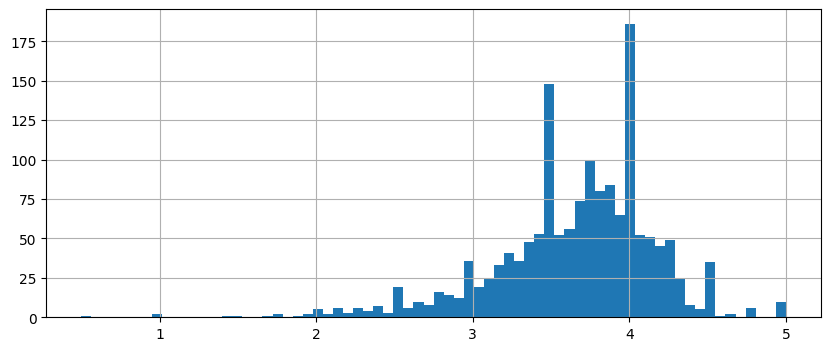

In [47]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [59]:
moviemat = df.pivot_table(index='userId', columns='title', values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
ratings.sort_values('rating', ascending=False).head(10)

,rating
title,
Come and See (Idi i smotri) (1985),5.0
Lady Jane (1986),5.0
"Woman Under the Influence, A (1974)",5.0
Into the Woods (1991),5.0
Two Family House (2000),5.0
Crossing Delancey (1988),5.0
"Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)",5.0
Who Killed Chea Vichea? (2010),5.0
More (1998),5.0


In [64]:
similar_to_500_days_summer  = moviemat.corrwith(moviemat['(500) Days of Summer (2009)'])
similar_to_500_days_summer.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [66]:
corr_500_days = pd.DataFrame(similar_to_500_days_summer,columns= ['Correlation'])
corr_500_days.dropna(inplace=True)
corr_500_days.head()

,Correlation
title,
"'burbs, The (1989)",0.997176
(500) Days of Summer (2009),1.000000
*batteries not included (1987),0.944911
10 Cloverfield Lane (2016),0.383713
10 Things I Hate About You (1999),0.344985


In [69]:
corr_500_days.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Red Rock West (1992),1.0
Think Like a Man (2012),1.0
"Batman: The Dark Knight Returns, Part 1 (2012)",1.0
"Nightmare on Elm Street, A (1984)",1.0
"Crush, The (1993)",1.0
The Shape of Water (2017),1.0
The Spectacular Now (2013),1.0
"Fabulous Baker Boys, The (1989)",1.0
Newsies (1992),1.0


In [70]:
similar_to_fight_club = moviemat.corrwith(moviemat['Fight Club (1999)'])
similar_to_fight_club.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [75]:
fight_club = pd.DataFrame(similar_to_fight_club,columns= ['Correlation'])
fight_club.dropna(inplace=True)
fight_club.head().sort_values('Correlation', ascending=False)

,Correlation
title,
...And Justice for All (1979),1.000000
10 Cent Pistol (2015),1.000000
*batteries not included (1987),0.426401
(500) Days of Summer (2009),-0.044359
"'burbs, The (1989)",-0.374498


In [81]:
import pandas as pd


def get_similar_movies(movie_name, moviemat, top_n=10):
    try:

        similar_to_movie = moviemat.corrwith(moviemat[movie_name])


        corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])


        corr_movie.dropna(inplace=True)


        top_similar_movies = corr_movie.sort_values('Correlation', ascending=False).head(top_n)

        return top_similar_movies
    except KeyError:
        return f"Movie '{movie_name}' not found in the dataset."


user_movie = input("Enter the movie name: ")


top_similar_movies = get_similar_movies(user_movie, moviemat, top_n=10)
print(top_similar_movies)


Enter the movie name: Avatar (2009)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


                                   Correlation
title                                         
Jezebel (1938)                             1.0
Derailed (2005)                            1.0
Bernie (2011)                              1.0
Berlin Calling (2008)                      1.0
Samouraï, Le (Godson, The) (1967)          1.0
Benny & Joon (1993)                        1.0
SLC Punk! (1998)                           1.0
Lost in Austen (2008)                      1.0
Tin Man (2007)                             1.0
Lord of the Flies (1963)                   1.0
